In [1]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
## Load Data "Mall_customers.csv" using pandas
dfa = pd.read_csv(".\Data\data\Mall_Customers.csv", delimiter=',')
dfa.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
## extract only columns 'Age' and 'Annual Income (k$)' from dfa
dfa = dfa[["Age","Annual Income (k$)"]]
dfa.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [4]:
## do the following plot
dfa.plot.scatter(x="Annual Income (k$)", y="Age", title='Annual Income vs Age', figsize=(10, 7), s=100)

<Axes: title={'center': 'Annual Income vs Age'}, xlabel='Annual Income (k$)', ylabel='Age'>

In [5]:
## Feature Scaling: see  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(dfa.astype(float))

In [6]:
# display the first 20 rows of dfa_std
print(dfa_std[:20])

[[-1.42456879 -1.73899919]
 [-1.28103541 -1.73899919]
 [-1.3528021  -1.70082976]
 [-1.13750203 -1.70082976]
 [-0.56336851 -1.66266033]
 [-1.20926872 -1.66266033]
 [-0.27630176 -1.62449091]
 [-1.13750203 -1.62449091]
 [ 1.80493225 -1.58632148]
 [-0.6351352  -1.58632148]
 [ 2.02023231 -1.58632148]
 [-0.27630176 -1.58632148]
 [ 1.37433211 -1.54815205]
 [-1.06573534 -1.54815205]
 [-0.13276838 -1.54815205]
 [-1.20926872 -1.54815205]
 [-0.27630176 -1.50998262]
 [-1.3528021  -1.50998262]
 [ 0.94373197 -1.43364376]
 [-0.27630176 -1.43364376]]


In [7]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(10,7))

# do the plot below
ax.scatter(dfa_std[:,0], dfa_std[:,1] , s=100)
# set a title and labels
ax.set_title('Age vs Annual income')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')


Text(0, 0.5, 'Age')

In [8]:
## see: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
## Clustering with KMeans : number of cluster is 3
kmeans = KMeans( n_clusters=3 , random_state=42).fit(dfa_std)
## return the clusters labels (or number) for each row of our data
labels = kmeans.labels_

C:\Users\traor\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\traor\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\traor\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\traor\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

In [9]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [10]:
grades = pd.read_csv("./Data/data/grades2.csv")
grades

,grade1,grade2,grade3,result
0,34.623660,78.024693,NaN,0
1,30.286711,43.894998,NaN,0
2,35.847409,72.902198,NaN,0
3,60.182599,86.308552,NaN,1
4,79.032736,75.344376,NaN,1
5,45.083277,56.316372,NaN,0
6,61.106665,96.511426,NaN,1
7,75.024746,46.554014,NaN,1
8,84.432820,43.533393,NaN,1
9,75.013658,30.603263,NaN,0


In [11]:
d_grades = grades[['grade1','grade2','result']]
d_grades

,grade1,grade2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,84.432820,43.533393,1
9,75.013658,30.603263,0


In [12]:
d_grades["grade1"][d_grades["result"] == 0]

0     34.623660
1     30.286711
2     35.847409
5     45.083277
9     75.013658
11    39.538339
13    67.946855
Name: grade1, dtype: float64

In [13]:
d_grades["grade2"][d_grades["result"] == 0]

0     78.024693
1     43.894998
2     72.902198
5     56.316372
9     30.603263
11    76.036811
13    46.678574
Name: grade2, dtype: float64

In [14]:
## based on example above, retrive "grade1" with "result" = 1
d_grades["grade1"][d_grades["result"] == 1]

3     60.182599
4     79.032736
6     61.106665
7     75.024746
8     84.432820
10    82.307053
12    69.070144
Name: grade1, dtype: float64

In [15]:
## based on example above, retrive "grade2" with "result" = 1
d_grades["grade2"][d_grades["result"] == 1]

3     86.308552
4     75.344376
6     96.511426
7     46.554014
8     43.533393
10    76.481963
12    52.740470
Name: grade2, dtype: float64

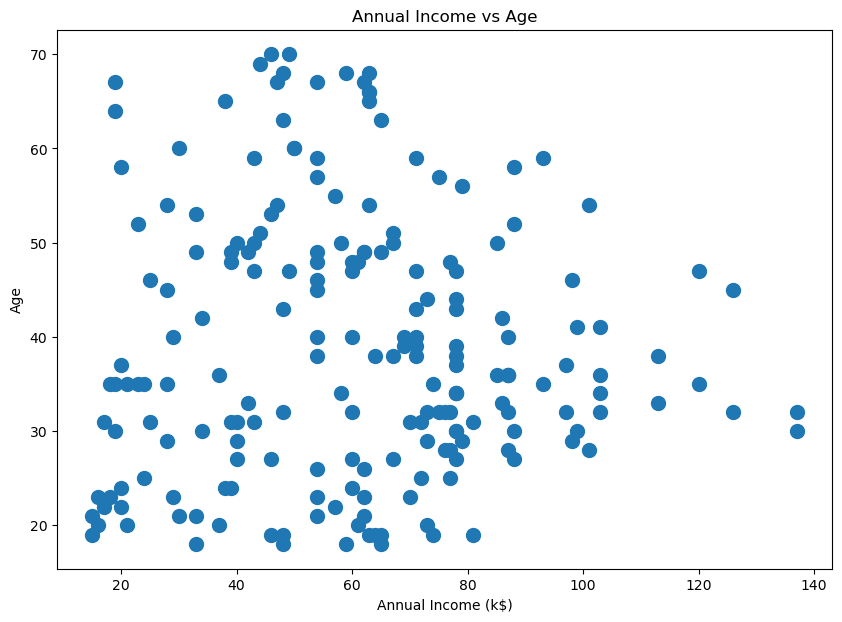

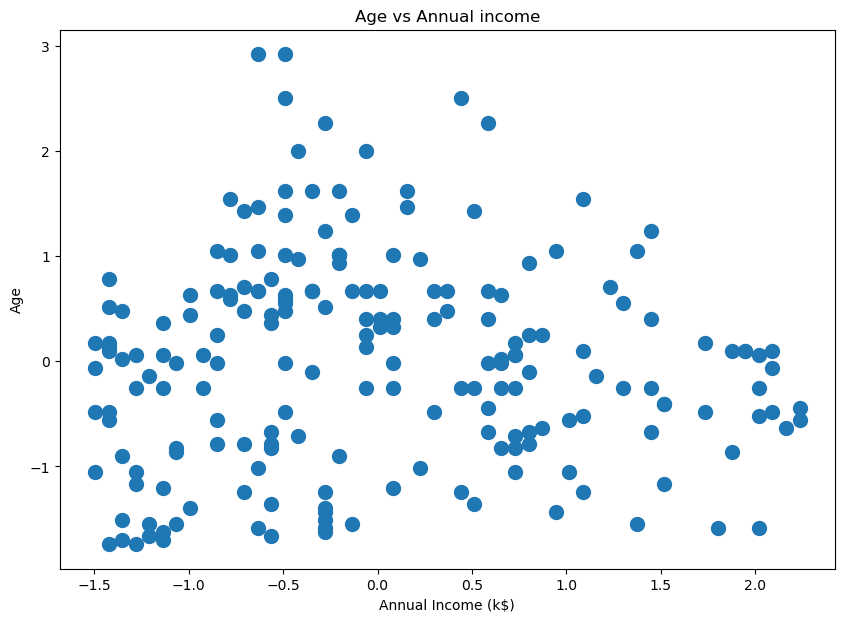

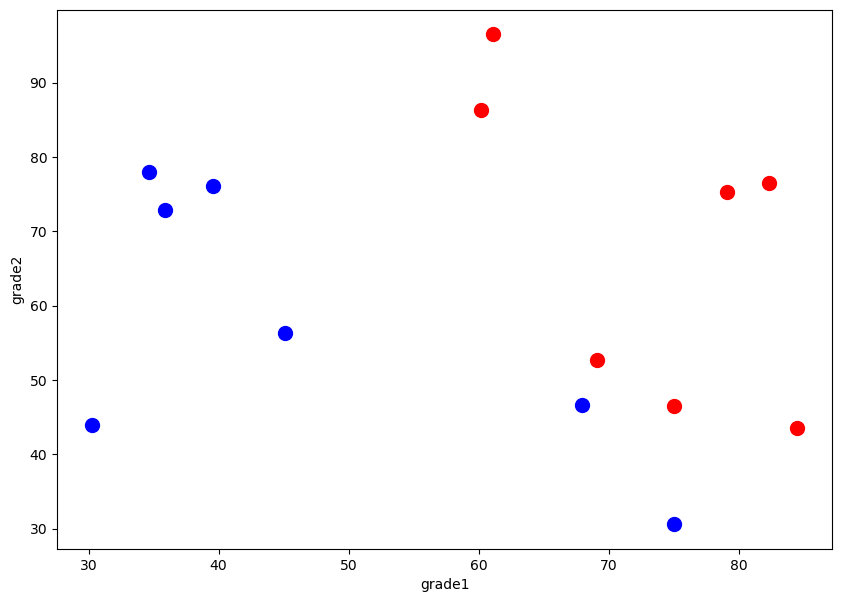

In [16]:
fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(d_grades["grade1"][d_grades["result"] == 0], d_grades["grade2"][d_grades["result"] == 0], 
            color = "blue", s=100)

plt.scatter(d_grades["grade1"][d_grades["result"] == 1], d_grades["grade2"][d_grades["result"] == 1], 
            color = "red", s=100)



ax.set_xlabel('grade1')
ax.set_ylabel('grade2')

plt.show()

In [21]:
## convert array dfa_std into pandas data frame with columns names 'Age' and 'Annual Income (k$)'
new_dfa = pd.DataFrame(data = dfa_std, columns = ['Age','Annual Income (k$)'])
## add new column 'label_kmeans' to new_dfa data frame with column values equal 'labels' variable
new_dfa['label_kmeans'] = labels
new_dfa

,Age,Annual Income (k$),label_kmeans
0,-1.424569,-1.738999,2
1,-1.281035,-1.738999,2
2,-1.352802,-1.700830,2
3,-1.137502,-1.700830,2
4,-0.563369,-1.662660,2
...,...,...,...
195,-0.276302,2.268791,1
196,0.441365,2.497807,1
197,-0.491602,2.497807,1
198,-0.491602,2.917671,1


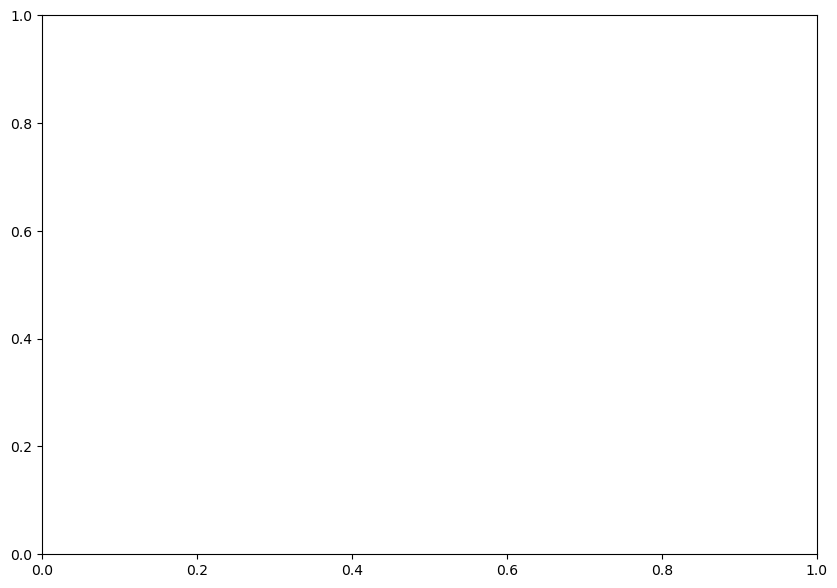

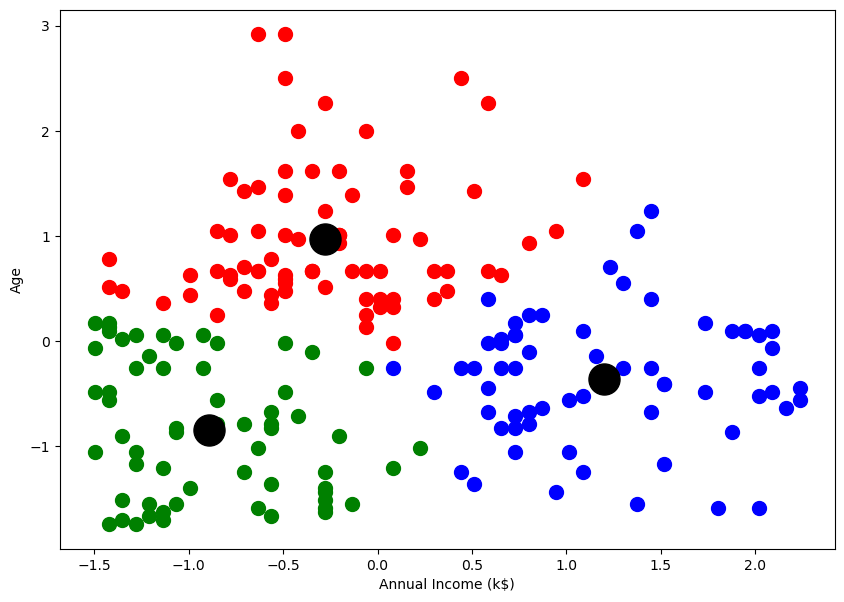

In [23]:
## based on the example above, do the following plot using "new_dfa" data frame

fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(new_dfa["Age"][new_dfa["label_kmeans"] == 0], new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 0], 
            color = "blue", s=100)

plt.scatter(new_dfa["Age"][new_dfa["label_kmeans"] == 1], new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 1], 
            color = "red", s=100)

plt.scatter(new_dfa["Age"][new_dfa["label_kmeans"] == 2], new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 2], 
            color = "green", s=100)

## retrive centroides values which are array of size 3x2
centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
ax.set_xlabel('Annual Income (k$)')

ax.set_ylabel('Age')

plt.show()

In [24]:
centers

array([[ 1.19890242, -0.35460006],
       [-0.27913465,  0.96851913],
       [-0.89043638, -0.84045329]])

In [27]:
## Prediction: predict the cluster label (or number) of a customer of age 19 and annual income 15000$
# hint: use the predict function from KMeans function
customer = np.array([[19,15000]])
print(kmeans.predict(customer))

[1]
